In [83]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import manifold
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

In [84]:
df = pd.read_csv("creditcard.csv")

In [85]:
df.head()

Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...       V21  \
0   0.0 -1.36 -0.07  2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -1.83e-02   
1   0.0  1.19  0.27  0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -2.26e-01   
2   1.0 -1.36 -1.34  1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  2.48e-01   
3   1.0 -0.97 -0.19  1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -1.08e-01   
4   2.0 -1.16  0.88  1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -9.43e-03   

        V22   V23   V24   V25   V26       V27   V28  Amount  Class  
0  2.78e-01 -0.11  0.07  0.13 -0.19  1.34e-01 -0.02  149.62      0  
1 -6.39e-01  0.10 -0.34  0.17  0.13 -8.98e-03  0.01    2.69      0  
2  7.72e-01  0.91 -0.69 -0.33 -0.14 -5.54e-02 -0.06  378.66      0  
3  5.27e-03 -0.19 -1.18  0.65 -0.22  6.27e-02  0.06  123.50      0  
4  7.98e-01 -0.14  0.14 -0.21  0.50  2.19e-01  0.22   69.99      0  

[5 rows x 31 columns]

In [86]:
df.isnull().values.ravel()

array([False, False, False, ..., False, False, False])

In [87]:
sum(df.isnull().values.ravel())

0

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The graph below shows the count of the Class column. '0' reperesnts non_fraudulent activities while '1' represents fraudulent activities.


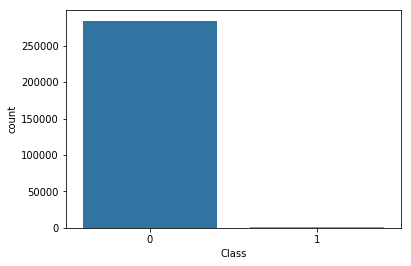

In [89]:
print("The graph below shows the count of the Class column. '0' reperesnts non_fraudulent activities while '1' represents fraudulent activities.")

sns.countplot(x='Class',data=df)

In [90]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [92]:
print (df.describe())

            Time        V1        V2        V3        V4        V5        V6  \
count  284807.00  2.85e+05  2.85e+05  2.85e+05  2.85e+05  2.85e+05  2.85e+05   
mean    94813.86  3.92e-15  5.69e-16 -8.77e-15  2.78e-15 -1.55e-15  2.01e-15   
std     47488.15  1.96e+00  1.65e+00  1.52e+00  1.42e+00  1.38e+00  1.33e+00   
min         0.00 -5.64e+01 -7.27e+01 -4.83e+01 -5.68e+00 -1.14e+02 -2.62e+01   
25%     54201.50 -9.20e-01 -5.99e-01 -8.90e-01 -8.49e-01 -6.92e-01 -7.68e-01   
50%     84692.00  1.81e-02  6.55e-02  1.80e-01 -1.98e-02 -5.43e-02 -2.74e-01   
75%    139320.50  1.32e+00  8.04e-01  1.03e+00  7.43e-01  6.12e-01  3.99e-01   
max    172792.00  2.45e+00  2.21e+01  9.38e+00  1.69e+01  3.48e+01  7.33e+01   

             V7        V8        V9  ...       V21       V22       V23  \
count  2.85e+05  2.85e+05  2.85e+05  ...  2.85e+05  2.85e+05  2.85e+05   
mean  -1.69e-15 -1.93e-16 -3.14e-15  ...  1.54e-16  7.96e-16  5.37e-16   
std    1.24e+00  1.19e+00  1.10e+00  ...  7.35e-01  7.26e

In [93]:
df.describe()

Time        V1        V2        V3        V4        V5        V6  \
count  284807.00  2.85e+05  2.85e+05  2.85e+05  2.85e+05  2.85e+05  2.85e+05   
mean    94813.86  3.92e-15  5.69e-16 -8.77e-15  2.78e-15 -1.55e-15  2.01e-15   
std     47488.15  1.96e+00  1.65e+00  1.52e+00  1.42e+00  1.38e+00  1.33e+00   
min         0.00 -5.64e+01 -7.27e+01 -4.83e+01 -5.68e+00 -1.14e+02 -2.62e+01   
25%     54201.50 -9.20e-01 -5.99e-01 -8.90e-01 -8.49e-01 -6.92e-01 -7.68e-01   
50%     84692.00  1.81e-02  6.55e-02  1.80e-01 -1.98e-02 -5.43e-02 -2.74e-01   
75%    139320.50  1.32e+00  8.04e-01  1.03e+00  7.43e-01  6.12e-01  3.99e-01   
max    172792.00  2.45e+00  2.21e+01  9.38e+00  1.69e+01  3.48e+01  7.33e+01   

             V7        V8        V9  ...       V21       V22       V23  \
count  2.85e+05  2.85e+05  2.85e+05  ...  2.85e+05  2.85e+05  2.85e+05   
mean  -1.69e-15 -1.93e-16 -3.14e-15  ...  1.54e-16  7.96e-16  5.37e-16   
std    1.24e+00  1.19e+00  1.10e+00  ...  7.35e-01  7.26e-01  6.24e-01   
min   -4.36e+01 -7.32e+01 -1.34e+01  ... -3.48e+01 -1.09e+01 -4.48e+01   
25%   -5.54e-01 -2.09e-01 -6.43e-01  ... -2.28e-01 -5.42e-01 -1.62e-01   
50%    4.01e-02  2.24e-02 -5.14e-02  ... -2.95e-02  6.78e-03 -1.12e-02   
75%    5.70e-01  3.27e-01  5.97e-01  ...  1.86e-01  5.29e-01  1.48e-01   
max    1.21e+02  2.00e+01  1.56e+01  ...  2.72e+01  1.05e+01  2.25e+01   

            V24       V25       V26       V27       V28     Amount     Class  
count  2.85e+05  2.85e+05  2.85e+05  2.85e+05  2.85e+05  284807.00  2.85e+05  
mean   4.46e-15  1.45e-15  1.70e-15 -3.66e-16 -1.21e-16      88.35  1.73e-03  
std    6.06e-01  5.21e-01  4.82e-01  4.04e-01  3.30e-01     250.12  4.15e-02  
min   -2.84e+00 -1.03e+01 -2.60e+00 -2.26e+01 -1.54e+01       0.00  0.00e+00  
25%   -3.55e-01 -3.17e-01 -3.27e-01 -7.08e-02 -5.30e-02       5.60  0.00e+00  
50%    4.10e-02  1.66e-02 -5.21e-02  1.34e-03  1.12e-02      22.00  0.00e+00  
75%    4.40e-01  3.51e-01  2.41e-01  9.10e-02  7.83e-02      77.16  0.00e+00  
max    4.58e+00  7.52e+00  3.52e+00  3.16e+01  3.38e+01   25691.16  1.00e+00  

[8 rows x 31 columns]

In [94]:
df.median()

Time      8.47e+04
V1        1.81e-02
V2        6.55e-02
V3        1.80e-01
V4       -1.98e-02
V5       -5.43e-02
V6       -2.74e-01
V7        4.01e-02
V8        2.24e-02
V9       -5.14e-02
V10      -9.29e-02
V11      -3.28e-02
V12       1.40e-01
V13      -1.36e-02
V14       5.06e-02
V15       4.81e-02
V16       6.64e-02
V17      -6.57e-02
V18      -3.64e-03
V19       3.73e-03
V20      -6.25e-02
V21      -2.95e-02
V22       6.78e-03
V23      -1.12e-02
V24       4.10e-02
V25       1.66e-02
V26      -5.21e-02
V27       1.34e-03
V28       1.12e-02
Amount    2.20e+01
Class     0.00e+00
dtype: float64

In [95]:
midValues = df.median()

In [96]:
df.mean()

Time      9.48e+04
V1        3.92e-15
V2        5.69e-16
V3       -8.77e-15
V4        2.78e-15
V5       -1.55e-15
V6        2.01e-15
V7       -1.69e-15
V8       -1.93e-16
V9       -3.14e-15
V10       1.77e-15
V11       9.17e-16
V12      -1.81e-15
V13       1.69e-15
V14       1.48e-15
V15       3.48e-15
V16       1.39e-15
V17      -7.53e-16
V18       4.33e-16
V19       9.05e-16
V20       5.09e-16
V21       1.54e-16
V22       7.96e-16
V23       5.37e-16
V24       4.46e-15
V25       1.45e-15
V26       1.70e-15
V27      -3.66e-16
V28      -1.21e-16
Amount    8.83e+01
Class     1.73e-03
dtype: float64

In [97]:
avgValues = df.mean()

In [98]:
import statistics

In [99]:
print('Mean of the Amount:', np.mean(df['Amount']))
print('Standard Deviation of the Amount:', np.std(df['Amount']))
print('Median of the Amount:', np.median(df['Amount']))
print('Variance of the Amount:', np.var(df['Amount']))

Mean of the Amount: 88.34961925087359
Standard Deviation of the Amount: 250.11967013526893
Median of the Amount: 22.0
Variance of the Amount: 62559.84938857574


In [100]:
import scipy
from scipy.stats import skew, kurtosis

In [101]:
print('Skewness of the Amount:', skew(df['Amount']))
print('Kurtosis of the Amount:', kurtosis(df['Amount']))

Skewness of the Amount: 16.97763503663315
Kurtosis of the Amount: 845.0777883188754


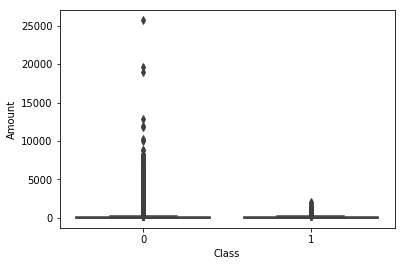

In [102]:
sns.boxplot(x='Class', y='Amount', data=df)

In [103]:
dfByClass = df.groupby('Class')

In [104]:
dfByClass.head()

Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...  \
0        0.0 -1.36 -0.07  2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ...   
1        0.0  1.19  0.27  0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ...   
2        1.0 -1.36 -1.34  1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...   
3        1.0 -0.97 -0.19  1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ...   
4        2.0 -1.16  0.88  1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ...   
541    406.0 -2.31  1.95 -1.61  4.00 -0.52 -1.43 -2.54  1.39 -2.77  ...   
623    472.0 -3.04 -3.16  1.09  2.29  1.36 -1.06  0.33 -0.07 -0.27  ...   
4920  4462.0 -2.30  1.76 -0.36  2.33 -0.82 -0.08  0.56 -0.40 -0.24  ...   
6108  6986.0 -4.40  1.36 -2.59  2.68 -1.13 -1.71 -3.50 -0.25 -0.25  ...   
6329  7519.0  1.23  3.02 -4.30  4.73  3.62 -1.36  1.71 -0.50 -1.28  ...   

           V21       V22   V23   V24   V25   V26       V27   V28  Amount  \
0    -1.83e-02  2.78e-01 -0.11  0.07  0.13 -0.19  1.34e-01 -0.02  149.62   
1    -2.26e-01 -6.39e-01  0.10 -0.34  0.17  0.13 -8.98e-03  0.01    2.69   
2     2.48e-01  7.72e-01  0.91 -0.69 -0.33 -0.14 -5.54e-02 -0.06  378.66   
3    -1.08e-01  5.27e-03 -0.19 -1.18  0.65 -0.22  6.27e-02  0.06  123.50   
4    -9.43e-03  7.98e-01 -0.14  0.14 -0.21  0.50  2.19e-01  0.22   69.99   
541   5.17e-01 -3.50e-02 -0.47  0.32  0.04  0.18  2.61e-01 -0.14    0.00   
623   6.62e-01  4.35e-01  1.38 -0.29  0.28 -0.15 -2.53e-01  0.04  529.00   
4920 -2.94e-01 -9.32e-01  0.17 -0.09 -0.16 -0.54  3.96e-02 -0.15  239.93   
6108  5.74e-01  1.77e-01 -0.44 -0.05  0.25 -0.66 -8.27e-01  0.85   59.00   
6329 -3.79e-01 -7.04e-01 -0.66 -1.63  1.49  0.57 -1.00e-02  0.15    1.00   

      Class  
0         0  
1         0  
2         0  
3         0  
4         0  
541       1  
623       1  
4920      1  
6108      1  
6329      1  

[10 rows x 31 columns]

In [105]:
dfByClass.mean()

Time        V1        V2    V3        V4        V5        V6  \
Class                                                                     
0      94838.20  8.26e-03 -6.27e-03  0.01 -7.86e-03  5.45e-03  2.42e-03   
1      80746.81 -4.77e+00  3.62e+00 -7.03  4.54e+00 -3.15e+00 -1.40e+00   

             V7        V8        V9  ...       V20       V21       V22  \
Class                                ...                                 
0      9.64e-03 -9.87e-04  4.47e-03  ... -6.44e-04 -1.23e-03 -2.43e-05   
1     -5.57e+00  5.71e-01 -2.58e+00  ...  3.72e-01  7.14e-01  1.40e-02   

            V23       V24       V25       V26       V27       V28  Amount  
Class                                                                      
0      6.98e-05  1.82e-04 -7.17e-05 -8.94e-05 -2.95e-04 -1.31e-04   88.29  
1     -4.03e-02 -1.05e-01  4.14e-02  5.16e-02  1.71e-01  7.57e-02  122.21  

[2 rows x 30 columns]

In [106]:
dfByClass.median()

Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...  \
Class                                                                 ...   
0      84711.0  0.02  0.06  0.18 -0.02 -0.05 -0.27  0.04  0.02 -0.05  ...   
1      75568.5 -2.34  2.72 -5.08  4.18 -1.52 -1.42 -3.03  0.62 -2.21  ...   

        V20   V21       V22   V23   V24   V25       V26       V27   V28  \
Class                                                                     
0     -0.06 -0.03  6.74e-03 -0.01  0.04  0.02 -5.22e-02  1.23e-03  0.01   
1      0.28  0.59  4.84e-02 -0.07 -0.06  0.09  4.32e-03  3.95e-01  0.15   

       Amount  
Class          
0       22.00  
1        9.25  

[2 rows x 30 columns]

In [107]:
dfByClass.sum()

Time      V1      V2       V3       V4      V5      V6       V7  \
Class                                                                        
0      2.70e+10  2347.8 -1782.9  3460.37 -2234.68  1550.4  687.69  2739.82   
1      3.97e+07 -2347.8  1782.9 -3460.37  2234.68 -1550.4 -687.69 -2739.82   

           V8       V9  ...     V20     V21   V22    V23    V24    V25    V26  \
Class                   ...                                                     
0     -280.75  1269.91  ... -183.18 -351.09 -6.91  19.83  51.72 -20.39 -25.41   
1      280.75 -1269.91  ...  183.18  351.09  6.91 -19.83 -51.72  20.39  25.41   

         V27    V28    Amount  
Class                          
0     -83.92 -37.23  2.51e+07  
1      83.92  37.23  6.01e+04  

[2 rows x 30 columns]

Notice how the sum of the values on the columns from V1 to V28 are inverses of each other and summing the values of the Fraudulent cases and the Non-Fraudulent cases will give an ABSOLUTE VALUE of zero (0). This shows that the data set has already under gone some form of normalisation (except the TIME and AMOUNT columns) probably to hide some customers' information as a way of protecting their identities. This means that we do not need to carry out anyform of normalisation on the data set, except we want to work with the TIME and AMOUNT columns.

In [108]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

In [109]:
corMatrix = df.corr()

In [110]:
corMatrix

Time        V1        V2        V3        V4        V5        V6  \
Time    1.00e+00  1.17e-01 -1.06e-02 -4.20e-01 -1.05e-01  1.73e-01 -6.30e-02   
V1      1.17e-01  1.00e+00  4.70e-17 -1.42e-15  1.76e-17  6.39e-17  2.40e-16   
V2     -1.06e-02  4.70e-17  1.00e+00  2.51e-16 -1.13e-16 -2.04e-16  5.02e-16   
V3     -4.20e-01 -1.42e-15  2.51e-16  1.00e+00 -3.42e-16 -1.44e-15  1.43e-15   
V4     -1.05e-01  1.76e-17 -1.13e-16 -3.42e-16  1.00e+00 -1.94e-15 -2.71e-16   
V5      1.73e-01  6.39e-17 -2.04e-16 -1.44e-15 -1.94e-15  1.00e+00  7.93e-16   
V6     -6.30e-02  2.40e-16  5.02e-16  1.43e-15 -2.71e-16  7.93e-16  1.00e+00   
V7      8.47e-02  1.99e-15  3.97e-16  2.17e-15  1.56e-16 -4.21e-16  1.43e-16   
V8     -3.69e-02 -9.49e-17 -4.41e-17  3.43e-16  5.20e-16  7.59e-16 -1.71e-16   
V9     -8.66e-03  2.17e-16 -5.73e-17 -4.23e-16  3.86e-16  4.21e-16  1.11e-16   
V10     3.06e-02  7.43e-17 -4.78e-16  6.29e-16  6.06e-16 -6.60e-16  2.85e-16   
V11    -2.48e-01  2.44e-16  9.47e-16 -5.50e-17 -2.08e-16  7.34e-16  4.87e-16   
V12     1.24e-01  2.42e-16 -6.59e-16  2.21e-16 -5.66e-16  3.76e-16  2.14e-16   
V13    -6.59e-02 -2.12e-16  3.85e-16 -6.88e-16 -1.51e-16 -9.58e-16 -2.27e-16   
V14    -9.88e-02  9.35e-16 -2.54e-16  4.27e-16 -8.52e-17 -3.63e-16  3.45e-16   
V15    -1.83e-01 -3.25e-16  2.83e-16  1.12e-16 -1.51e-16 -5.13e-16 -6.37e-18   
V16     1.19e-02  6.31e-16  4.93e-17  1.18e-15 -6.94e-16 -3.52e-16 -2.48e-16   
V17    -7.33e-02 -5.01e-16 -9.88e-16  4.58e-17 -4.40e-16  1.43e-16  3.57e-16   
V18     9.04e-02  2.87e-16  2.64e-16  5.43e-16  1.49e-16  1.11e-15  2.81e-16   
V19     2.90e-02  1.82e-16  9.53e-17  2.58e-16 -2.66e-16 -3.14e-16  2.72e-16   
V20    -5.09e-02  1.04e-16 -9.31e-16 -9.43e-16 -3.22e-16  2.08e-16  1.90e-16   
V21     4.47e-02 -1.76e-16  8.44e-17 -2.97e-17 -9.98e-17 -1.37e-16 -1.58e-16   
V22     1.44e-01  7.48e-17  2.50e-16  4.65e-16  2.10e-16  5.06e-16 -3.36e-16   
V23     5.11e-02  9.81e-16  1.06e-16  2.12e-17  6.00e-17  1.64e-16 -7.23e-17   
V24    -1.62e-02  7.35e-17 -8.14e-18 -9.35e-17  2.23e-16 -9.29e-16 -1.26e-15   
V25    -2.33e-01 -9.81e-16 -4.26e-17  4.77e-16  5.39e-16  5.63e-16  1.08e-15   
V26    -4.14e-02 -8.62e-17  2.60e-16  6.52e-16 -6.18e-16  9.14e-16 -2.38e-16   
V27    -5.13e-03  3.21e-17 -4.48e-16  6.24e-16 -6.40e-17  4.47e-16 -2.62e-16   
V28    -9.41e-03  9.82e-16 -3.68e-16  7.73e-16 -5.86e-17 -3.30e-16  4.81e-16   
Amount -1.06e-02 -2.28e-01 -5.31e-01 -2.11e-01  9.87e-02 -3.86e-01  2.16e-01   
Class  -1.23e-02 -1.01e-01  9.13e-02 -1.93e-01  1.33e-01 -9.50e-02 -4.36e-02   

              V7        V8        V9  ...       V21       V22       V23  \
Time    8.47e-02 -3.69e-02 -8.66e-03  ...  4.47e-02  1.44e-01  5.11e-02   
V1      1.99e-15 -9.49e-17  2.17e-16  ... -1.76e-16  7.48e-17  9.81e-16   
V2      3.97e-16 -4.41e-17 -5.73e-17  ...  8.44e-17  2.50e-16  1.06e-16   
V3      2.17e-15  3.43e-16 -4.23e-16  ... -2.97e-17  4.65e-16  2.12e-17   
V4      1.56e-16  5.20e-16  3.86e-16  ... -9.98e-17  2.10e-16  6.00e-17   
V5     -4.21e-16  7.59e-16  4.21e-16  ... -1.37e-16  5.06e-16  1.64e-16   
V6      1.43e-16 -1.71e-16  1.11e-16  ... -1.58e-16 -3.36e-16 -7.23e-17   
V7      1.00e+00 -8.69e-17  7.93e-16  ...  1.94e-16 -1.06e-15  2.33e-16   
V8     -8.69e-17  1.00e+00  2.90e-16  ... -2.41e-16  5.48e-16  3.90e-16   
V9      7.93e-16  2.90e-16  1.00e+00  ...  4.58e-17  2.87e-17  5.93e-16   
V10     3.04e-17  9.05e-17 -2.77e-16  ...  8.09e-16 -6.71e-16  3.81e-16   
V11    -1.08e-15  1.95e-16  4.68e-16  ... -3.91e-16 -3.81e-17  2.23e-16   
V12     1.51e-15 -6.27e-17 -2.45e-15  ...  3.23e-16 -5.90e-16  1.39e-16   
V13    -9.89e-17 -2.38e-16 -2.65e-16  ...  9.50e-17 -2.66e-17 -5.88e-16   
V14    -1.73e-16 -1.13e-16  2.34e-16  ...  1.63e-17  3.44e-16  7.62e-17   
V15     1.94e-17  2.02e-16 -1.59e-15  ...  1.95e-17 -8.94e-16  1.12e-16   
V16     2.89e-16  5.03e-16 -3.25e-16  ... -3.93e-16  3.88e-17  8.52e-16   
V17     1.15e-15 -3.51e-16  6.54e-16  ... -7.75e-16 -8.39e-16  5.37e-16   
V18    -1.12e-16 -4.09e-16

Normalizing the amount and time columns

In [111]:
df['normAmount'] = 100 * (df['Amount'] - df['Amount'].mean()) / (df['Amount'].max() - df['Amount'].min())

In [112]:
df['normTime'] = 100 * (df['Time'] - df['Time'].mean()) / (df['Time'].max() - df['Time'].min())

In [113]:
df.sample(5)

Time    V1    V2    V3    V4    V5        V6    V7    V8    V9  \
188863  128165.0  2.11 -0.74 -1.47 -0.90 -0.24  8.47e-03 -0.97  0.06 -0.28   
206472  136223.0  0.20 -0.47 -0.71 -3.24  1.04 -8.62e-01  0.73 -0.49 -2.77   
40962    40479.0  1.12  0.17  0.69  0.72 -0.51 -7.96e-01  0.10 -0.16 -0.12   
180635  124629.0  2.07  0.11 -3.38  0.11  3.17  2.98e+00  0.24  0.55 -0.35   
212838  139012.0 -0.20  0.76  2.40  4.43  0.45  1.12e+00  0.10 -0.08 -1.29   

        ...   V23   V24   V25   V26       V27   V28  Amount  Class  \
188863  ...  0.02  0.01 -0.06 -0.11  2.02e-02 -0.02   39.99      0   
206472  ... -0.21  0.30 -0.39 -0.22 -8.28e-03 -0.02    7.00      0   
40962   ...  0.19  0.63  0.09  0.08 -1.28e-02  0.03   34.99      0   
180635  ... -0.02  0.71  0.60 -0.39 -1.78e-02 -0.07    1.00      0   
212838  ... -0.10  0.03 -0.83  0.40 -2.11e-01 -0.22    5.47      0   

        normAmount  normTime  
188863       -0.19     19.30  
206472       -0.32     23.96  
40962        -0.21    -31.45  
180635       -0.34     17.25  
212838       -0.32     25.58  

[5 rows x 33 columns]

In [114]:
print('Skewness of the normAmount:', skew(df['normAmount']))
print('Kurtosis of the normAmount:', kurtosis(df['normAmount']))

Skewness of the normAmount: 16.97763503663314
Kurtosis of the normAmount: 845.0777883188745


Paying more attention too the time variable as we will be using it for further analysis, together with the amount variable to predic the Class of the transactions

In [115]:
pd.set_option('precision', 2)
df.loc[:, ['Time', 'Amount']].describe()

Time     Amount
count  284807.00  284807.00
mean    94813.86      88.35
std     47488.15     250.12
min         0.00       0.00
25%     54201.50       5.60
50%     84692.00      22.00
75%    139320.50      77.16
max    172792.00   25691.16

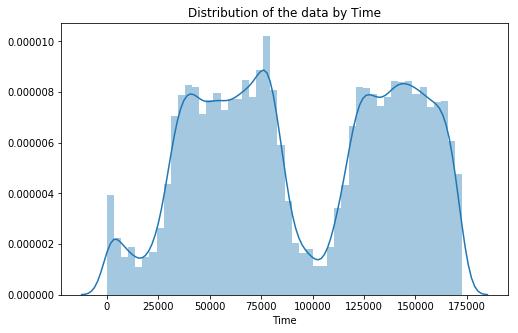

In [116]:
plt.figure(figsize=(8,5))
plt.title('Distribution of the data by Time')
sns.distplot(df['Time'])

In [117]:
print('Mean of the Time:', np.mean(df['Time']))
print('Median of the Time:', np.median(df['Time']))
print('Maximum Time:', np.max(df['Time']))
print('Minimum TIme:', np.min(df['Time']))

Mean of the Time: 94813.85957508067
Median of the Time: 84692.0
Maximum Time: 172792.0
Minimum TIme: 0.0


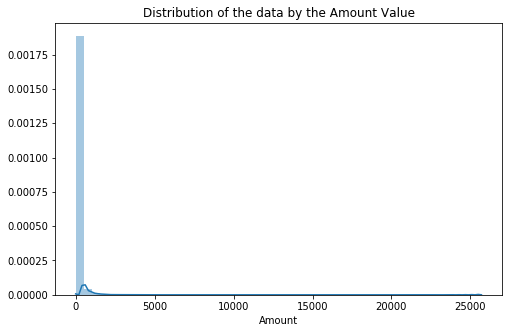

In [118]:
plt.figure(figsize=(8,5))
plt.title('Distribution of the data by the Amount Value')
sns.distplot(df['Amount'])

In [119]:
print('Mean of the Amount:', np.mean(df['Amount']))
print('Median of the Amount:', np.median(df['Amount']))
print('Maximum Amount:', np.max(df['Amount']))
print('Minimum Amount:', np.min(df['Amount']))

Mean of the Amount: 88.34961925087359
Median of the Amount: 22.0
Maximum Amount: 25691.16
Minimum Amount: 0.0


Calculating the total and percentage of both clean and fraudulent transactions

In [120]:
counts = df.Class.value_counts()
clean = counts[0]
fraudulent = counts[1]
percent_clean = (clean/(clean+fraudulent))*100
percent_fraudulent = (fraudulent/(clean+fraudulent))*100
print('There were {} Non-Fraudulent transactions ({:.2f}%) and {} Fraudulent transactions ({:.2f}%).'.format(clean, percent_clean, fraudulent, percent_fraudulent))

There were 284315 Non-Fraudulent transactions (99.83%) and 492 Fraudulent transactions (0.17%).


Preprocessing the Time and Amount variables for model creation and analysis

In [121]:
from sklearn.preprocessing import StandardScaler

Scaling the time variable using the .fit_transform method

In [122]:
scaler = StandardScaler()
ScaledTime = scaler.fit_transform(df[['Time']])
fl1 = [item for sublist in ScaledTime.tolist() for item in sublist]
ScaledTime = pd.Series(fl1)

Scaling the Amount

In [123]:
ScaledAmount = scaler.fit_transform(df[['Amount']])
fl2 = [item for sublist in ScaledAmount.tolist() for item in sublist]
ScaledAmount = pd.Series(fl2)

Adding these two new variables with the main dataframe df

In [124]:
df = pd.concat([df, ScaledAmount.rename('ScaledAmount'), ScaledTime.rename('ScaledTime')], axis=1)

In [125]:
df.head(10)

Time    V1    V2    V3    V4    V5    V6        V7    V8    V9  ...   V25  \
0   0.0 -1.36 -0.07  2.54  1.38 -0.34  0.46  2.40e-01  0.10  0.36  ...  0.13   
1   0.0  1.19  0.27  0.17  0.45  0.06 -0.08 -7.88e-02  0.09 -0.26  ...  0.17   
2   1.0 -1.36 -1.34  1.77  0.38 -0.50  1.80  7.91e-01  0.25 -1.51  ... -0.33   
3   1.0 -0.97 -0.19  1.79 -0.86 -0.01  1.25  2.38e-01  0.38 -1.39  ...  0.65   
4   2.0 -1.16  0.88  1.55  0.40 -0.41  0.10  5.93e-01 -0.27  0.82  ... -0.21   
5   2.0 -0.43  0.96  1.14 -0.17  0.42 -0.03  4.76e-01  0.26 -0.57  ... -0.23   
6   4.0  1.23  0.14  0.05  1.20  0.19  0.27 -5.16e-03  0.08  0.46  ...  0.75   
7   7.0 -0.64  1.42  1.07 -0.49  0.95  0.43  1.12e+00 -3.81  0.62  ... -0.42   
8   7.0 -0.89  0.29 -0.11 -0.27  2.67  3.72  3.70e-01  0.85 -0.39  ...  0.37   
9   9.0 -0.34  1.12  1.04 -0.22  0.50 -0.25  6.52e-01  0.07 -0.74  ... -0.07   

    V26       V27       V28  Amount  Class  normAmount  normTime  \
0 -0.19  1.34e-01 -2.11e-02  149.62      0        0.24    -54.87   
1  0.13 -8.98e-03  1.47e-02    2.69      0       -0.33    -54.87   
2 -0.14 -5.54e-02 -5.98e-02  378.66      0        1.13    -54.87   
3 -0.22  6.27e-02  6.15e-02  123.50      0        0.14    -54.87   
4  0.50  2.19e-01  2.15e-01   69.99      0       -0.07    -54.87   
5  0.11  2.54e-01  8.11e-02    3.67      0       -0.33    -54.87   
6 -0.26  3.45e-02  5.17e-03    4.99      0       -0.32    -54.87   
7 -0.05 -1.21e+00 -1.09e+00   40.80      0       -0.19    -54.87   
8 -0.38  1.17e-02  1.42e-01   93.20      0        0.02    -54.87   
9  0.09  2.46e-01  8.31e-02    3.68      0       -0.33    -54.87   

   ScaledAmount  ScaledTime  
0          0.24        -2.0  
1         -0.34        -2.0  
2          1.16        -2.0  
3          0.14        -2.0  
4         -0.07        -2.0  
5         -0.34        -2.0  
6         -0.33        -2.0  
7         -0.19        -2.0  
8          0.02        -2.0  
9         -0.34        -2.0  

[10 rows x 35 columns]

In [126]:
df.sample(10)

Time    V1    V2    V3    V4    V5        V6    V7        V8  \
69222    53323.0  1.11 -0.98  0.99 -0.68 -1.39 -1.11e-02 -1.04  1.44e-01   
144445   86134.0 -0.57  0.33  1.39  0.12 -0.99  3.82e-01 -0.31  6.19e-01   
103218   68549.0  1.32 -0.91 -0.89 -3.08  1.13  3.16e+00 -1.20  8.97e-01   
3422      2930.0 -0.32  0.51  0.35 -2.60  1.18  2.60e-01  0.90  5.28e-04   
138151   82508.0  1.32 -0.31  0.16  0.41 -0.49 -7.54e-02 -0.44  2.52e-02   
205464  135759.0  2.08 -1.34  0.23 -0.96 -1.59  3.72e-01 -1.91  4.08e-01   
143201   85188.0 -1.29  0.65  0.83 -1.54 -1.32 -3.31e-01 -0.61  5.34e-01   
144788   86401.0 -0.13  1.05 -0.71 -0.51  1.78 -3.66e-01  1.24 -2.43e-01   
221633  142640.0 -3.24 -3.81 -1.77 -1.04  0.49  2.93e-01 -1.02  1.21e+00   
126155   77947.0 -1.42  0.93  2.10 -1.86 -0.88 -2.41e-03 -1.00 -2.32e+00   

          V9  ...       V25   V26   V27   V28  Amount  Class  normAmount  \
69222  -0.79  ...  2.89e-01 -0.06  0.04  0.03   99.00      0        0.04   
144445  0.01  ... -1.08e+00  0.92  0.03  0.12   80.44      0       -0.03   
103218  2.33  ...  8.39e-01 -0.63  0.11  0.03   11.91      0       -0.30   
3422    0.81  ...  1.73e-01 -0.72  0.24 -0.05    1.00      0       -0.34   
138151 -0.85  ...  5.19e-01 -0.21  0.05  0.02   11.99      0       -0.30   
205464  0.54  ... -4.87e-01 -0.14  0.04 -0.04    3.95      0       -0.33   
143201  1.74  ... -1.63e-01 -0.47 -0.68 -0.18   20.51      0       -0.26   
144788 -0.17  ... -2.88e-03  0.68 -0.04 -0.03    9.36      0       -0.31   
221633 -0.70  ... -2.00e+00 -0.42  0.56 -0.85  110.00      0        0.08   
126155  1.10  ...  3.60e-01 -0.76  0.33  0.17    1.00      0       -0.34   

        normTime  ScaledAmount  ScaledTime  
69222     -24.01          0.04       -0.87  
144445     -5.02         -0.03       -0.18  
103218    -15.20         -0.31       -0.55  
3422      -53.18         -0.35       -1.93  
138151     -7.12         -0.31       -0.26  
205464     23.70         -0.34        0.86  
143201     -5.57         -0.27       -0.20  
144788     -4.87         -0.32       -0.18  
221633     27.68          0.09        1.01  
126155     -9.76         -0.35       -0.36  

[10 rows x 35 columns]

Seeing that the normAmount variable and the ScaledAmount variable are actually similar, I will drop the normAmount variable along with the Amount and Time columns

In [127]:
df.drop(['normAmount', 'normTime', 'Amount', 'Time'], axis=1, inplace=True)

Splitting the data into Train and Test sets. Setting the train set to contain 70% of the dataset and the test set to contain 30% of the dataset.

In [128]:
spl = np.random.rand(len(df)) <= 0.70
train = df[spl]
test = df[~spl]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (199407, 31)
Test Shape: (85400, 31)


Reset the indexing of both the train and test sets

In [129]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

Trying to look for a balance for our data set, since the cases of Non-Fraudulent transactions are way larger than the Fraudulent cases. I will randomly try to select an equal amount of Fraudulent and Non Fraudulent cases.

First we find the number of Fraudulent Cases in our train data dataset. 

In [130]:
FraudCount = train['Class'].value_counts()[1]
print('The train dataset has {} fraudulent transactions.'.format(FraudCount))

The train dataset has 342 fraudulent transactions.


Now we randomly select the same number of non fraudulent cases from our train dataset

In [131]:
NonFraud = train[train['Class'] == 0]
Fraud = train[train['Class'] == 1]

In [132]:
train.Class.value_counts()

0    199065
1       342
Name: Class, dtype: int64

In [133]:
RS = NonFraud.sample(FraudCount)

In [134]:
RS

V1    V2    V3    V4    V5    V6    V7    V8        V9   V10  ...  \
95614   1.26 -0.90  1.07 -0.80 -1.40  0.27 -1.28  0.17 -5.60e-01  0.75  ...   
24107   1.30  0.22 -0.54  0.27  0.69  0.12  0.30 -0.14 -1.53e-01 -0.10  ...   
94062   0.90 -0.70 -0.04 -0.48 -1.07 -1.02 -0.22  0.05  1.55e+00 -1.38  ...   
119501  2.08 -0.02 -2.06  0.20  0.64 -0.80  0.49 -0.25  3.40e-03  0.35  ...   
170690  1.71 -0.80 -1.45 -0.07  0.50  1.09 -0.21  0.33  9.25e-01 -0.21  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...       ...   ...  ...   
15706  -1.69  1.05  1.55 -0.79 -1.05 -0.80  0.13  0.33  1.12e+00  0.18  ...   
163051 -0.82  1.24  0.49 -1.02  0.18 -0.34  0.29  0.22  1.16e+00 -0.58  ...   
180755 -1.32  0.87  0.81 -0.88  0.59  0.43  0.68  0.38 -3.88e-01 -0.46  ...   
102020 -1.69  1.93 -1.66 -0.67  0.05 -0.83  0.03  1.15 -9.00e-01 -0.94  ...   
81074  -0.33  0.58  2.38  2.60 -0.06  1.04 -0.42  0.54 -7.10e-01  0.54  ...   

         V22   V23   V24   V25   V26       V27       V28  Class  ScaledAmount  \
95614   0.08 -0.06 -0.28  0.04  1.13 -7.56e-03  1.88e-02      0         -0.17   
24107  -0.21 -0.23 -1.27  0.71  0.48 -3.49e-02 -6.29e-03      0         -0.26   
94062  -0.03 -0.22  0.41  0.49 -0.67  4.02e-02  6.78e-02      0          0.29   
119501  0.52  0.01  0.77  0.32  0.67 -1.23e-01 -9.03e-02      0         -0.35   
170690  0.03  0.12 -1.62 -0.28  0.01 -2.07e-03 -6.58e-02      0          0.09   
...      ...   ...   ...   ...   ...       ...       ...    ...           ...   
15706   0.49 -0.11  0.79 -0.07  0.96  3.36e-01  1.01e-01      0         -0.22   
163051 -0.82  0.01  0.42 -0.10 -0.28  3.49e-01  2.28e-01      0         -0.35   
180755 -0.18 -0.47  0.11  0.69  0.33 -1.58e-01 -2.42e-01      0         -0.11   
102020  0.97 -0.09  0.75 -0.44  0.50  2.51e-02  1.12e-01      0         -0.21   
81074   0.45  0.06  0.02 -0.68  0.02  1.45e-01  8.08e-02      0         -0.33   

        ScaledTime  
95614        -0.28  
24107        -1.20  
94062        -0.30  
119501        0.54  
170690        1.21  
...            ...  
15706        -1.32  
163051        1.11  
180755        1.34  
102020       -0.16  
81074        -0.44  

[342 rows x 31 columns]

Joining both the Fraud and RS dataframes together

In [135]:
setSample = pd.concat([Fraud, RS])

In [136]:
len(setSample)

684

In [137]:
setSample.head(10)

V1    V2    V3    V4    V5    V6    V7    V8    V9   V10  ...  \
383  -2.31e+00  1.95 -1.61  4.00 -0.52 -1.43 -2.54  1.39 -2.77 -2.77  ...   
444  -3.04e+00 -3.16  1.09  2.29  1.36 -1.06  0.33 -0.07 -0.27 -0.84  ...   
3429 -2.30e+00  1.76 -0.36  2.33 -0.82 -0.08  0.56 -0.40 -0.24 -1.53  ...   
4279 -4.40e+00  1.36 -2.59  2.68 -1.13 -1.71 -3.50 -0.25 -0.25 -4.80  ...   
4427  1.23e+00  3.02 -4.30  4.73  3.62 -1.36  1.71 -0.50 -1.28 -2.45  ...   
4428  8.43e-03  4.14 -6.24  6.68  0.77 -3.35 -1.63  0.15 -2.80 -6.19  ...   
4431  2.68e-02  4.13 -6.56  6.35  1.33 -2.51 -1.69  0.30 -3.14 -6.05  ...   
4495  7.26e-01  2.30 -5.33  4.01 -1.73 -1.73 -3.97  1.06 -0.49 -4.62  ...   
4509  7.03e-01  2.43 -5.23  4.42 -2.17 -2.67 -3.88  0.91 -0.17 -5.01  ...   
4527  1.02e+00  2.00 -4.77  3.82 -1.27 -1.73 -3.06  0.89  0.42 -3.96  ...   

           V22   V23   V24   V25   V26   V27   V28  Class  ScaledAmount  \
383  -3.50e-02 -0.47  0.32  0.04  0.18  0.26 -0.14      1         -0.35   
444   4.35e-01  1.38 -0.29  0.28 -0.15 -0.25  0.04      1          1.76   
3429 -9.32e-01  0.17 -0.09 -0.16 -0.54  0.04 -0.15      1          0.61   
4279  1.77e-01 -0.44 -0.05  0.25 -0.66 -0.83  0.85      1         -0.12   
4427 -7.04e-01 -0.66 -1.63  1.49  0.57 -0.01  0.15      1         -0.35   
4428 -6.08e-01 -0.54  0.13  1.49  0.51  0.74  0.51      1         -0.35   
4431 -5.77e-01 -0.67 -0.76  1.61  0.54  0.74  0.50      1         -0.35   
4495  1.10e-01  0.60 -0.36 -1.84  0.35  0.59  0.10      1         -0.35   
4509 -9.80e-03  0.72  0.47 -1.96  0.32  0.60  0.13      1         -0.35   
4527 -5.42e-02  0.71 -0.37 -2.03  0.37  0.40  0.02      1         -0.35   

      ScaledTime  
383        -1.99  
444        -1.99  
3429       -1.90  
4279       -1.85  
4427       -1.84  
4428       -1.84  
4431       -1.84  
4495       -1.84  
4509       -1.84  
4527       -1.83  

[10 rows x 31 columns]

Notice how the data is arranged in the order with which we have imported it. Now we reshuffle the index of the data set

In [138]:
setSample = setSample.sample(frac=1).reset_index(drop=True)
setSample.head(10)

V1     V2     V3    V4     V5    V6     V7     V8    V9   V10  ...  \
0  -5.96   5.31  -6.67  6.03  -1.39  0.67  -4.13  -4.77 -1.01  0.45  ...   
1 -16.60  10.54 -19.82  6.02 -13.03 -4.13 -14.12  11.16 -4.10 -9.22  ...   
2  -3.98   0.58  -1.88  4.32  -3.02  1.24  -1.91   0.66 -2.75 -3.55  ...   
3   0.04   0.84   0.76  0.90   0.93  0.60   0.37   0.10 -0.55 -0.09  ...   
4   1.98   0.22  -1.60  1.40   0.48 -1.12   0.74  -0.48  0.06  0.22  ...   
5   0.33   1.70  -2.60  3.64  -0.59 -0.65  -2.28   0.68 -2.04 -2.83  ...   
6  -5.55   5.68  -9.78  8.42  -4.41 -1.51  -6.90   3.75 -3.88 -6.86  ...   
7   1.39  -1.33  -0.04 -1.50  -1.12 -0.08  -0.97  -0.02 -1.65  1.39  ...   
8 -11.21   7.91 -13.99  4.33  -8.48 -3.51  -8.94   7.70 -2.34 -5.93  ...   
9   1.20  -0.51   1.45  0.55  -1.34  0.26  -1.14   0.17 -0.55  0.73  ...   

    V22   V23   V24       V25   V26   V27       V28  Class  ScaledAmount  \
0 -1.50  1.36  0.14  7.79e-02  0.47  0.29  1.47e+00      1      7.01e-02   
1 -1.15 -0.68  0.11  1.07e+00 -0.23  1.71  5.11e-01      1      4.65e-02   
2  1.40  1.05 -0.30  5.29e-03  0.24  0.96 -6.74e-01      1      1.47e+00   
3  0.31 -0.27 -1.30  3.83e-02 -0.14  0.09  6.47e-03      0     -3.49e-01   
4  0.44 -0.03  0.02  4.80e-01 -0.50 -0.01 -5.57e-02      0     -2.20e-01   
5 -0.14 -0.32 -0.77  8.08e-01  0.23  0.55  3.05e-01      1     -2.77e-01   
6  0.23  0.29 -0.54 -1.05e-01  0.42 -0.30 -9.46e-01      1      1.26e-01   
7 -0.38 -0.09 -0.81  3.64e-01 -0.13  0.02  2.02e-02      0      6.60e-03   
8 -0.99 -0.28 -0.03  6.44e-01 -0.26  1.08  2.12e-01      1      4.65e-02   
9  0.39  0.02  0.08  2.05e-01 -0.21  0.12  4.96e-02      0     -2.61e-01   

   ScaledTime  
0        0.50  
1       -1.47  
2       -0.73  
3       -1.00  
4        0.66  
5       -1.27  
6        0.17  
7       -1.32  
8       -0.92  
9       -0.22  

[10 rows x 31 columns]

Removing Outliers

In [139]:
q1 = setSample.quantile(0.25)
q3 = setSample.quantile(0.75)
IQR = q3 - q1

dt = setSample[~((setSample < (q1 - 2.5 * IQR)) |(setSample > (q3 + 2.5 * IQR))).any(axis=1)]

In [140]:
lenAfter = len(dt)
lenBefore = len(setSample)
lenDifference = len(setSample) - len(dt)

print('Our data size has been reduced from {} transaction by {} transactions. Now we have {} transactions. All outliers above and below the median or average transaction value has been removed.'.format(lenBefore, lenDifference, lenAfter))

Our data size has been reduced from 684 transaction by 206 transactions. Now we have 478 transactions. All outliers above and below the median or average transaction value has been removed.


**Taking a look at correlation of the new set sample

In [141]:
corr = dt.corr()
corr = corr[['Class']]
corr

Class
V1           -2.95e-01
V2            6.04e-01
V3           -6.63e-01
V4            7.07e-01
V5           -1.79e-01
V6           -4.25e-01
V7           -5.58e-01
V8            2.63e-01
V9           -5.38e-01
V10          -7.44e-01
V11           6.83e-01
V12          -7.03e-01
V13          -8.40e-02
V14          -7.88e-01
V15          -6.84e-02
V16          -5.31e-01
V17          -4.78e-01
V18          -2.79e-01
V19           7.73e-02
V20           3.34e-01
V21           4.29e-01
V22           6.96e-03
V23          -1.04e-01
V24          -1.68e-01
V25           9.49e-02
V26           7.45e-02
V27           4.14e-01
V28           3.83e-01
Class         1.00e+00
ScaledAmount -3.96e-02
ScaledTime   -1.17e-01

Looking out for correlations on both sides of the region of 0.5

In [142]:
#Correlation greater than 0.5, that is positive correlation
corr[corr.Class > 0.5]

Class
V2      0.60
V4      0.71
V11     0.68
Class   1.00

Visualising features with high positive correlation

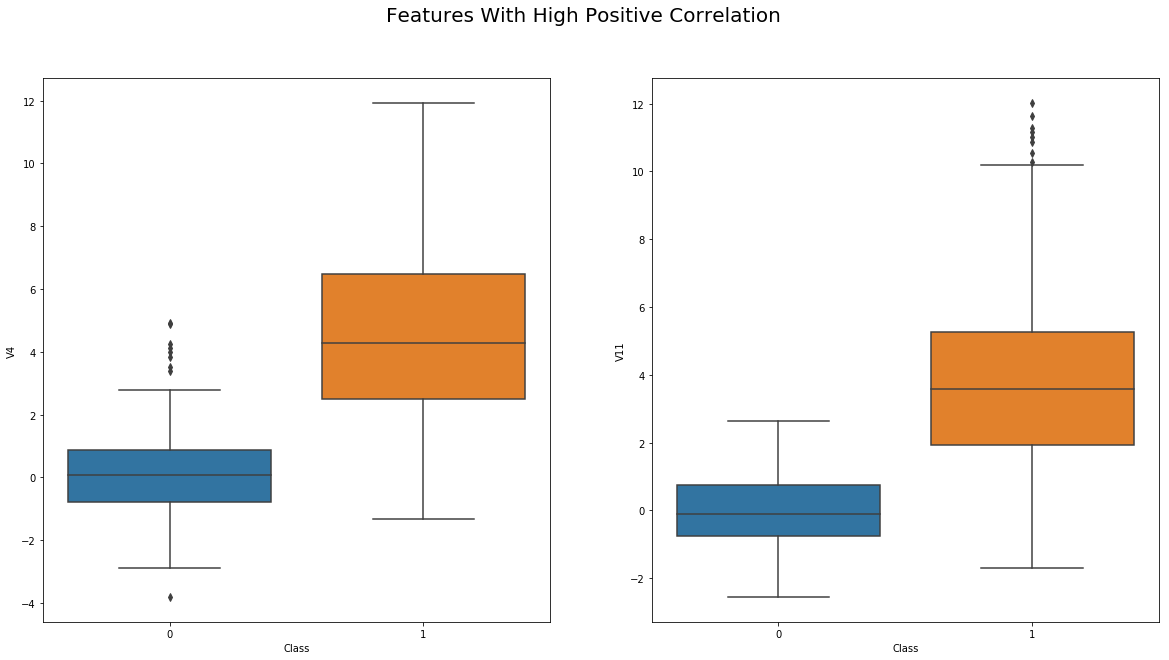

In [143]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=setSample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=setSample, ax=axes[1])

In [144]:
#Correlation less than 0.5, that is negative correlation
corr[corr.Class < -0.5]

Class
V3   -0.66
V7   -0.56
V9   -0.54
V10  -0.74
V12  -0.70
V14  -0.79
V16  -0.53

Visualising features with negative correlation

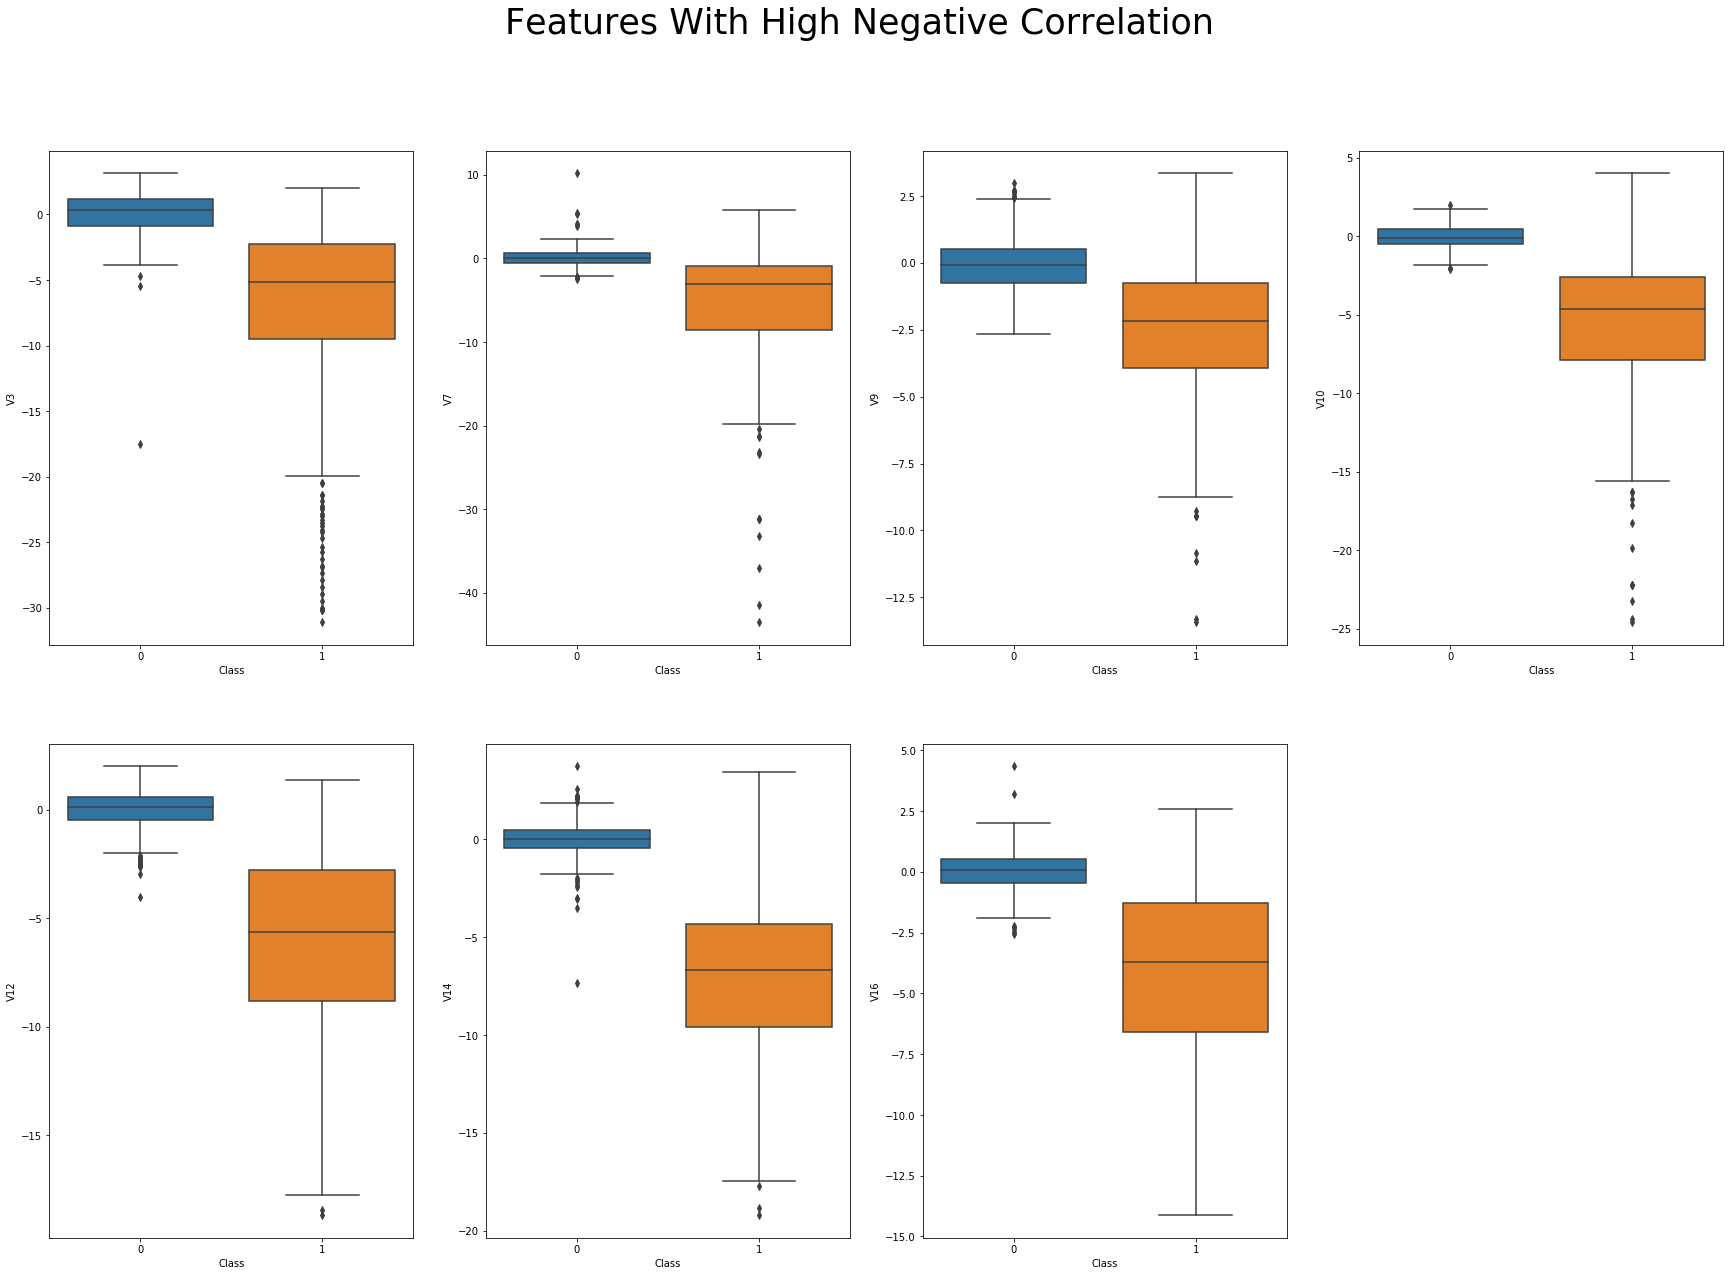

In [145]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(30,20))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=setSample, ax=axes[0,0])
sns.boxplot(x="Class", y="V7", data=setSample, ax=axes[0,1])
sns.boxplot(x="Class", y="V9", data=setSample, ax=axes[0,2])
sns.boxplot(x="Class", y="V10", data=setSample, ax=axes[0,3])
sns.boxplot(x="Class", y="V12", data=setSample, ax=axes[1,0])
sns.boxplot(x="Class", y="V14", data=setSample, ax=axes[1,1])
sns.boxplot(x="Class", y="V16", data=setSample, ax=axes[1,2])

f.delaxes(axes[1,3])

**t_SNE Dimensionality Reduction

In [146]:
NoClass = dt.drop('Class', axis=1)
clas = dt['Class']

In [147]:
#t-SNE
NoClass_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(NoClass.values)

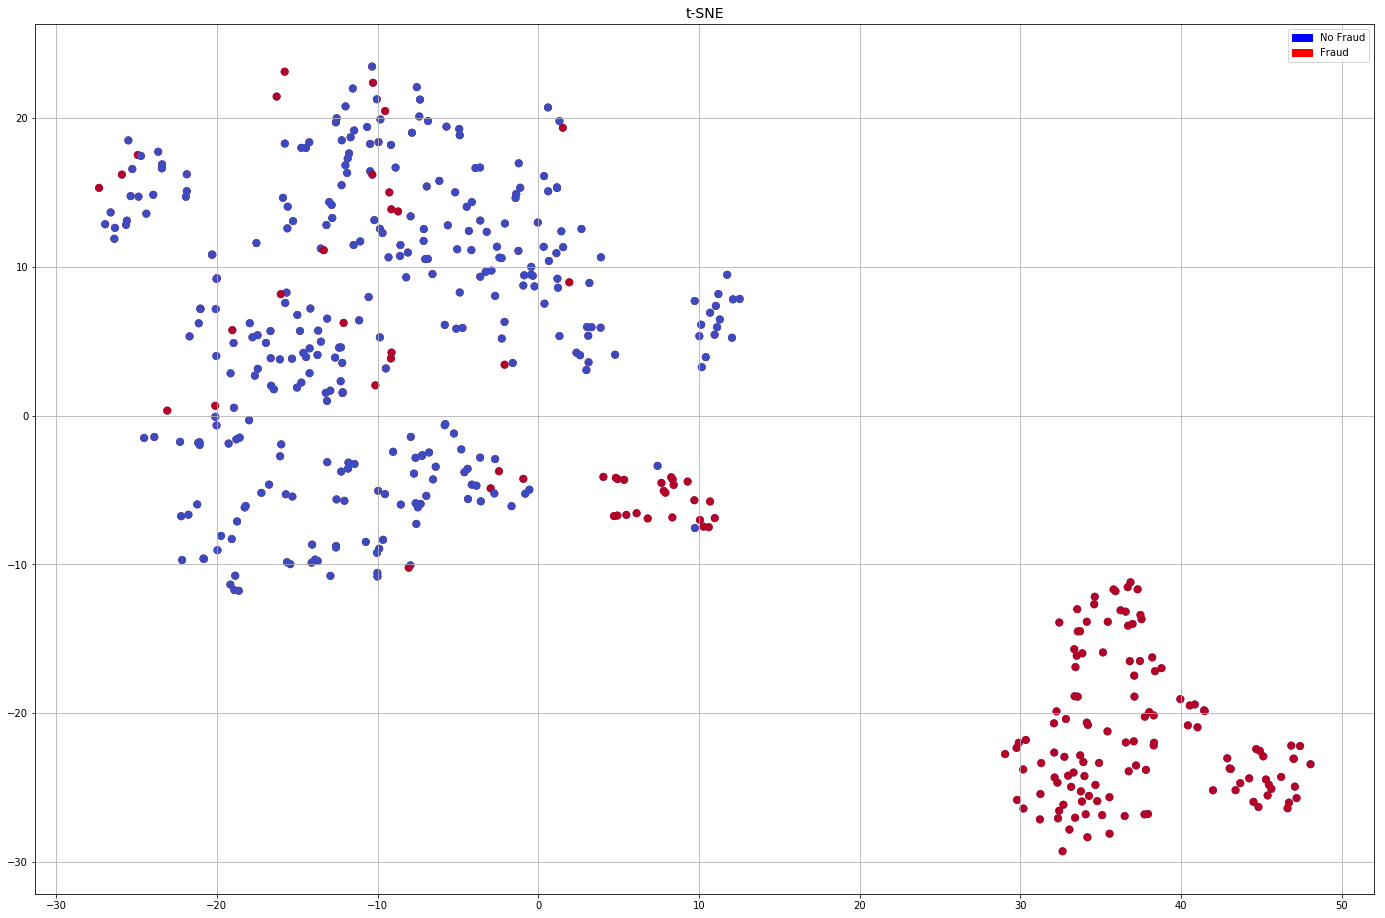

In [148]:
# t_SNE plot
f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='blue', label='No Fraud')
red_patch = mpatches.Patch(color='red', label='Fraud')

ax.scatter(NoClass_reduced_tsne[:,0], NoClass_reduced_tsne[:,1], c=(clas == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(NoClass_reduced_tsne[:,0], NoClass_reduced_tsne[:,1], c=(clas == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

**Classifier Algorithms
1. LogisticRegression
2. LinearDiscriminantAnalysis
3. KNeighborsClassifier
4. DecisionTreeClassifier
5. Support Vector Machines (SVC)
6. XGBClassifier
7. RandomForestClassifier

Importing libraries for classifier algorithms

In [149]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


Initialising WARNING

In [150]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Initialising the **train_test_split**

In [151]:
from sklearn.model_selection import train_test_split

NoClass_train, NoClass_test, clas_train, clas_test = train_test_split(NoClass, clas, test_size=0.2, random_state=42)

In [152]:
NoClass_train = NoClass_train.values
NoClass_validation = NoClass_test.values
clas_train = clas_train.values
clas_validation = clas_test.values

In [153]:
# Creating a list for the models to be stored in
models = []

In [154]:
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

Testing the models

In [155]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=20)
    cv_results = cross_val_score(model, NoClass_train, clas_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    md = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(md)

LR: 0.954158 (0.020003)
LDA: 0.948348 (0.018514)
KNN: 0.939102 (0.017734)
CART: 0.858729 (0.014030)
SVM: 0.945770 (0.016951)
XGB: 0.959653 (0.014451)
RF: 0.938760 (0.020879)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Comparing the performance of the different model algorithms in a boxplot

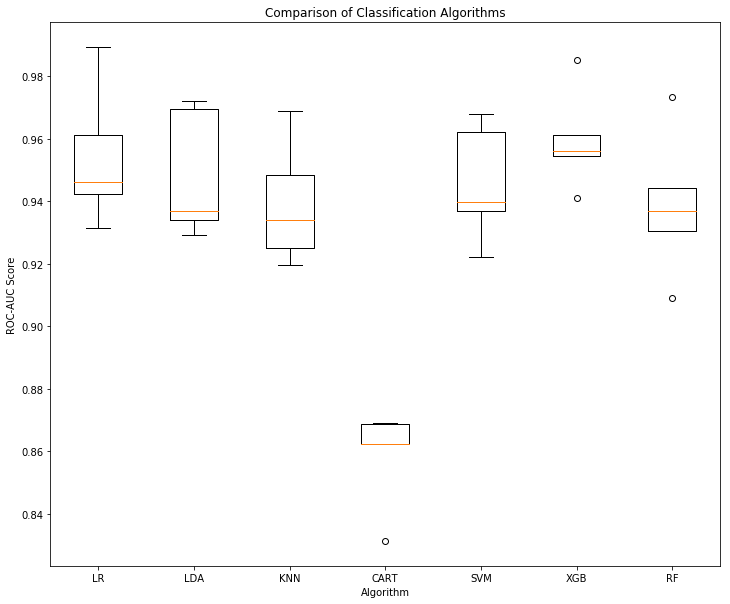

In [156]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

**Decision Tree Visualization

In [157]:
#Random Forest Classifier with 10 fold estimators
RFCmodel = RandomForestClassifier(n_estimators=10)

In [158]:
RFCfit = RFCmodel.fit(NoClass_train, clas_train)

In [159]:
RFCfit

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Extracting a single Decision Tree

In [160]:
est = RFCmodel.estimators_[9]

In [161]:
est

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1748893498, splitter='best')

In [162]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(est, out_file='tree.dot', 
                feature_names = NoClass.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command that requires Graphviz
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the image in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')